In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datas_w = []
datas_h = []
w_0 = 0.204
plate = pd.read_csv(f'flat.d', skiprows=2, sep = '\t', dtype = float)

for i in range(0,6):

    w_temp = round(w_0 + 0.05*i, 3)
    
    datas_w.append({'data': pd.read_csv(f'flux_oneD_=_MonteCarlo_w=_{w_temp}_.d', skiprows=2, sep = '\t', dtype = float), 'name': f'{round(1000*w_temp,0)} nm'})

for i in range(1,11):

    h_temp = round(0.01*i, 3)
    datas_h.append({'data': pd.read_csv(f'flux_oneD_=_MonteCarlo_h=_{h_temp}_.d', skiprows=2, sep = '\t', dtype = float),
                  'name': f'{1000*h_temp} nm'})

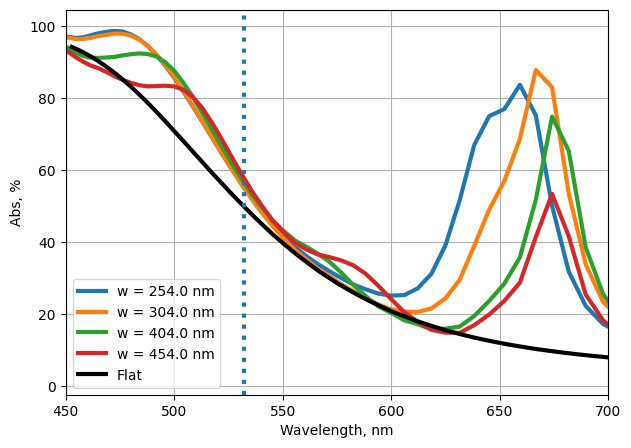

In [24]:
fig, ax = plt.subplots(figsize = (7, 5))

for i in range(len(datas)):
    
    if i % 3 == 0 and not (i == 100): continue
    w = float(datas[i]['name'].split(' ')[0])

    ax.plot(1000*datas_w[i]['data'].iloc[:, 0], 100*(1-datas_w[i]['data'].iloc[:, 1]/datas_w[i]['data'].iloc[:, 2]), label = 'w = ' + datas[i]['name'], linewidth = 3)

ax.plot(1000*plate.iloc[:, 0], 100*(1-plate.iloc[:, 1]/plate.iloc[:, 2]), label = 'Flat', color = 'k', linewidth = 3)

ax.grid()
ax.set_xlabel('Wavelength, nm')
ax.set_ylabel('Abs, %')
ax.set_xlim(left = 450, right = 700)
ax.legend()
ax.axvline(532, linewidth = 3, linestyle = 'dotted')

fig.savefig('fig_4a')

Fig. 4a. Dependence of the absorption spectra of the photocathode on its geometric parameters. Variation of w with a fixed period p = 512 nm and H = 32 nm; 

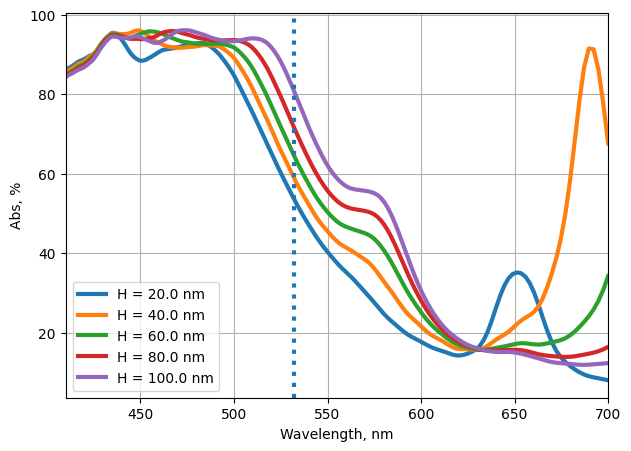

In [28]:
fig, ax = plt.subplots(figsize = (7, 5))

#ax.plot(1000*plate.iloc[:, 0], 100*(1-plate.iloc[:, 1]/plate.iloc[:, 2]), label = 'Flat', linewidth = 3, color = 'k')

for i in range(len(datas_h)):

    H = float(datas_h[i]['name'].split(' ')[0])
    if H % 20 != 0:
        continue
    
    ax.plot(1000*datas_h[i]['data'].iloc[:, 0], 100*(datas_h[i]['data'].iloc[:, -1]/datas_h[i]['data'].iloc[:, 2]), label = 'H = ' + datas_h[i]['name'], linewidth = 3)

ax.axvline(532, linewidth = 3, linestyle = 'dotted')
ax.grid()
ax.set_xlabel('Wavelength, nm')
ax.set_xlim(right = 700, left = 410)
ax.set_ylabel('Abs, %')
ax.legend()
#ax.set_title('Зависимость от высоты канавки')

fig.savefig('fig_4b')

Fig. 4b. Dependence of the absorption spectra of the photocathode on its geometric parameters. Variation of groove depth H with a fixed period p = 512 nm and width w = 408 nm. Semiconductor thickness is h = 8 nm